In [1]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (764,) and (294,)

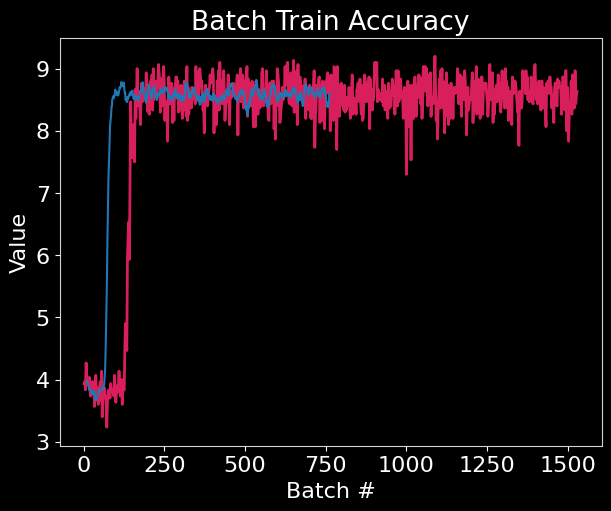

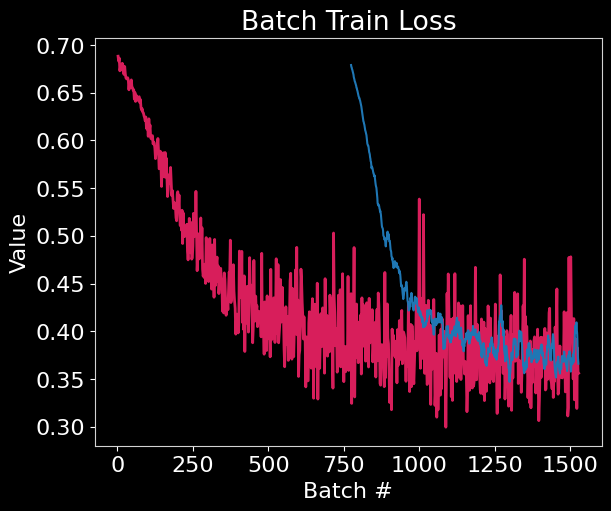

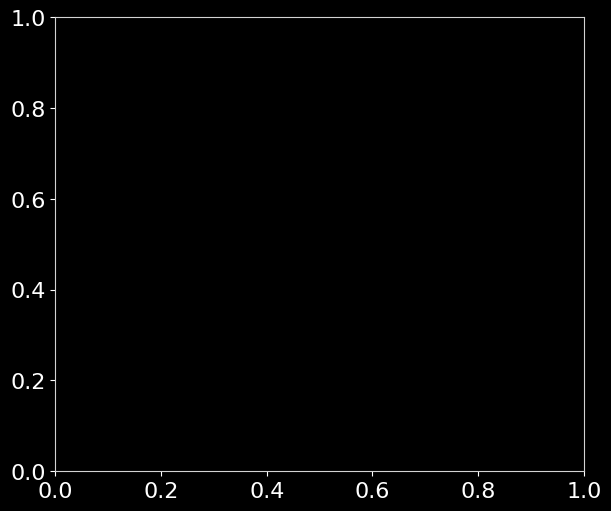

In [2]:
# load in a model output, this will change as we run the models

# log_dir = '/home/jupyter/RNN/trained_models/20240720-202741/events.out.tfevents.1721507261.parmar-workbench.17710.0'
# log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240723-023109/events.out.tfevents.1721701869.pugal1-numeric-train.117840.0'
# log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240723-033123/events.out.tfevents.1721705483.pugal1-numeric-train.130684.0'
# log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240723-050742/events.out.tfevents.1721711262.pugal1-numeric-train.150685.0'
# log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240723-055712/events.out.tfevents.1721714232.pugal1-numeric-train.160790.0'
# log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240723-065840/events.out.tfevents.1721717920.pugal1-numeric-train.193645.0'
# log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240723-185509/events.out.tfevents.1721760909.pugal1-numeric-train.346037.0'
# log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240724-181043/events.out.tfevents.1721844643.pugal1-numeric-train.643386.0'
# log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240724-185642/events.out.tfevents.1721847402.pugal1-numeric-train.653043.0'
# log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240724-193044/events.out.tfevents.1721849444.pugal1-numeric-train.660664.0'
# log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240724-195817/events.out.tfevents.1721851097.pugal1-numeric-train.667068.0'
log_dir = '/home/jupyter/fdl-2024-mars/ML_Models/RNN/trained_models/20240724-220920/events.out.tfevents.1721858960.pugal1-numeric-train.695669.0'



# change the figure parameters here so that we can just grab the output
# into our presentation

plt.rcParams['font.size'] = 16
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

# read the model output
reader = SummaryReader(log_dir)
df = reader.scalars

# there are 4 different outputs from out model
# TODO: make this dynamic if needed
uniq_tags = df['tag'].unique()

# Make sure that y axis is the data plot and x is the epoch 
# the epoch we are at will be same for all, and is called
# by 'step' for each tag
epoch_number = df[(df['tag']) == uniq_tags[0]]['step']

window_size = 10

# plot all the data here
for i in range(len(uniq_tags)):
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 5), layout='constrained')
    y_data = df[(df['tag']) == uniq_tags[i]]['value']
    ax1.plot(epoch_number, y_data, linewidth=2, color='#D81E5B')
    ax1.plot(y_data.rolling(window_size).mean().shift(1), label='moving avg')
    ax1.set_title(uniq_tags[i])
    ax1.set_xlabel('Batch #')
    ax1.set_ylabel('Value')
#     file_name = "model_output_" + "%s.png" % (uniq_tags[i].replace(" ", ""))
#     plt.savefig(file_name) # comment this if we don't want to save the plots and uncomment the next line
#     # plt.show()